
# Task 4: Try to improve the performance of the CBIR system using other image representation techniques.

In this task I have used Python libraries for image retrieval tasks. NumPy is employed for numerical computing, TensorFlow for machine learning, and EfficientNetB7, a pre-trained deep learning model, is leveraged for image feature extraction. The GlobalAveragePooling2D layer in Keras helps reduce spatial dimensions in neural networks. The scikit-learn library provides the cosine_similarity function for measuring vector similarity. Matplotlib is used for visualization, and ‘time’ is likely used for time-related functions. Together, these libraries facilitate the implementation and evaluation of a content-based image retrieval system.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import time

Also, I have used some libraries such as datasets, base64, OpenCV, and NumPy. “datasets” facilitates tasks like dataset loading, base64 for image decoding and encoding,” OpenCV” and “NumPy” for image processing tasks.

As task1 and 2, the images have been loaded from a JSON file containing image samples. The dataset is processed using a function named ‘process_fn’, which decodes base64-encoded image bytes and converts them into OpenCV image objects. The resulting images are stored in a NumPy array named ‘images’. This approach ensures that the images are ready for further analysis

In [ ]:
from datasets import load_dataset
from base64 import b64decode

import numpy as np
import cv2

def process_fn(sample):
    image_bytes = b64decode(sample['image_bytes'])
    image = cv2.imdecode(np.frombuffer(image_bytes, np.uint8), cv2.IMREAD_COLOR)
    return image

dataset_dict = load_dataset('json', data_files='images_set.json')
data = dataset_dict['train']
images = np.array([process_fn(sample) for sample in data], dtype="object")


The EfficientNetB7 model, which is a deep neural network pre-trained on the ImageNet dataset, is loaded into my Python environment using the TensorFlow and Keras libraries. This pre-trained model has already learned useful features from a large set of images during its training on ImageNet. By setting include_top to False, I exclude the last layer of the model, which is responsible for classifying objects into ImageNet categories. This allows me to use the model as a feature extractor rather than a complete classification model. The loaded model is stored in the variable base_model for potential use.


In [ ]:
# Load EfficientNetB7 model pre-trained on ImageNet
base_model = EfficientNetB7(weights='imagenet', include_top=False)



258076736/258076736 [==============================] - 23s 0us/step


Adapting the EfficientNetB7 model involves using the Global Average Pooling (GAP) layer to extract key features from images. The GAP layer simplifies the information by averaging values in each feature map, reducing data while retaining important features. It's like summarizing information about the image's essential characteristics. The final model, named 'model,' takes the original input and produces this feature-rich output, making it suitable for tasks like image similarity comparison or retrieval.
Pooling is a technique in deep learning where you reduce the spatial dimensions of a feature map. Global Average Pooling specifically calculates the average of all values in each feature map, creating a more compact and essential description of the image features.


In [ ]:
# Extract features using Global Average Pooling (GAP)
x = base_model.output
x = GlobalAveragePooling2D()(x)
model = Model(inputs=base_model.input, outputs=x)

These two functions preprocess and extract features for a list of images using the previously adapted EfficientNetB7 model. The ‘preprocess_image’ function applies necessary preprocessing steps to an image array, and the ‘get_features’ function uses the model to predict features for each image in the list. The resulting ‘image_features’ array holds the flattened feature vectors for all input images, providing a condensed representation of their key characteristics for further analysis or comparison.

In [ ]:
# Function to preprocess and get features for an image
def preprocess_image(img_array):
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)
    return img_array

# Function to get features for a list of images
def get_features(image_list):
    features = []
    for img_array in image_list:
        img_array = preprocess_image(img_array)
        feature = model.predict(np.expand_dims(img_array, axis=0))
        features.append(feature.flatten())
    return np.array(features)

image_features = get_features(images)

1/1 [==============================] - 0s 287ms/step


The ‘image_retrieval’ function performs image retrieval using cosine similarity. It takes a query image, a list of images, and an optional parameter for the number of top results to retrieve (‘top_n’). The query image is first processed to obtain its features using the adapted EfficientNetB7 model. Cosine similarity is then calculated between the query features and the features of all images in the dataset. The indices of the most similar images are retrieved based on these cosine similarity scores, and the top-ranked images are displayed along with their respective similarity scores. The function returns the indices of the retrieved images.

In [ ]:
# Function to perform image retrieval using cosine similarity
def image_retrieval(query_image, images, top_n=15):
    query_feature = model.predict(np.expand_dims(preprocess_image(query_image), axis=0)).flatten()

    similarities = cosine_similarity([query_feature], image_features)[0]
    indices = similarities.argsort()[-top_n:][::-1]

    # Display results
    plt.figure(figsize=(50, 36))
    plt.subplot(top_n + 1, 1, 1)
    plt.imshow(query_image)
    plt.title('Query Image')
    plt.axis('off')

    # Display Retrieval Results
    for i in range(top_n):
        plt.figure(figsize=(50, 36))
        plt.subplot(top_n + 1, 1, i + 2)
        plt.imshow(images[indices[i]])
        plt.title(f"Rank {i+1} similarity: {similarities[indices[i]]:.2f}")
        plt.axis('off')
    plt.show()
    return indices

1/1 [==============================] - 0s 276ms/step


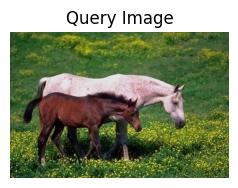

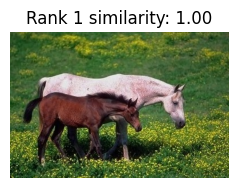

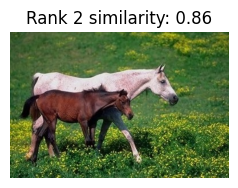

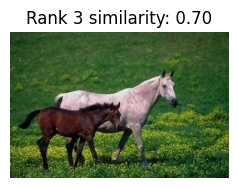

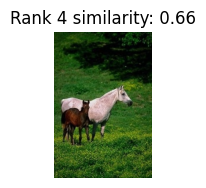

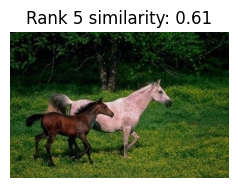

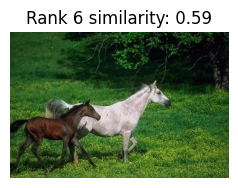

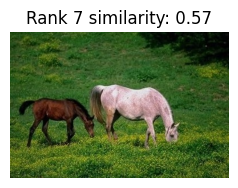

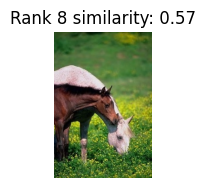

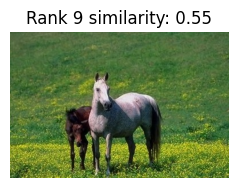

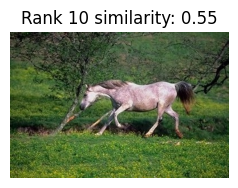

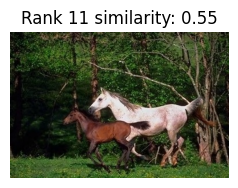

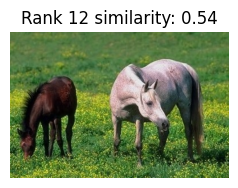

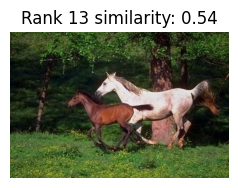

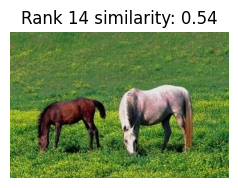

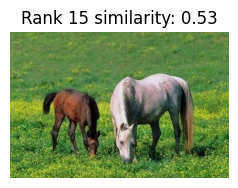

array([734, 739, 752, 779, 792, 735, 799, 794, 750, 751, 798, 758, 736,
       768, 743], dtype=int64)

In [ ]:
# Example usage
query_image_index = 734  # Change this index based on your query image
query_image = images[query_image_index]
image_retrieval(query_image, images)


We can observe the top 15 ranked results for the query image indexed 734. All of the retrieved images (734, 739, 752, 779, 792, 735, 799, 794, 750, 751, 798, 758, 736, 768, 743) are relevant and belong to the same category '700-799.' This is a positive indicator of the model's quality!



'tp_relevant_retrieved', 'evaluation_metrics', and 'plot_roc_curve_from_values' all are used in the previous tasks and had been explained.

‘task_four’ function aims to evaluate the performance of the image retrieval system based on the features obtained from the adapted EfficientNetB7 model using cosine similarity. It takes a query image (‘img’), the number of top results to retrieve (‘top_k’), and the threshold range (‘from_’ to ‘to’). The function calculates the elapsed time for the retrieval process, retrieves the
top indices, and then evaluates the system's performance using ‘evaluation_metrics’ whish is used in the previous tasks, to evaluate false positive rate (fpr), true positive rate (tpr/recall), precision, and F1-score. The function returns these metrics along with the elapsed time.

In [ ]:
def tp_relevant_retrieved(from_, to, indices):
    r_r = 0
    for idx in indices:
        if from_ <= idx <= to:
            r_r += 1
    return r_r


def evaluation_metrics(from_, to, indices):
    tp = tp_relevant_retrieved(from_, to, indices)
    fp = len(indices) - tp
    fn = 100 - tp
    tn = 1000 - (tp + fp + fn)

    tpr_recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0

    precision = tp / (tp + fp) if (tp + fp) != 0 else 0

    f1_score = (2 * tpr_recall * precision) / (tpr_recall + precision) if (tpr_recall + precision) != 0 else 0

    return tpr_recall, fpr, precision, f1_score


def task_four(img, top_k, from_, to):
    start_time = time.time()
    top_idx, similarities = image_retrieval(img, images, top_k)
    end_time = time.time()

    elapsed_time = end_time - start_time

    tpr_recall, fpr, precesion, f1_score = evaluation_metrics(from_, to, top_idx)

    return fpr, tpr_recall, precesion, f1_score, elapsed_time


def plot_roc_curve_from_values(fpr, tpr):
    auc_value = np.trapz(tpr, fpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_value:.2f}' if auc_value is not None else '')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

The ‘run()’ function, previously employed in Task 1 and 2, has been repurposed for Task 4, with a modification to enhance accuracy. In this iteration, the function utilizes 15 query images instead of 10 for a more comprehensive evaluation. Additionally, the ROC curve function, consistent with earlier tasks, is applied to visualize the model's performance based on false positive rates (fpr) and true positive rates (tpr). This expanded set of query images aims to provide a more robust assessment of the Content-Based Image Retrieval (CBIR) system's effectiveness.

In [ ]:
def run():
    img_lst = [5, 105, 290, 345, 427, 500, 665, 777, 838, 911, 523, 622, 731, 875, 947]
    top_imgs = 5

    fpr_avg = []
    tpr_avg = []
    precesion_avg = []
    f1_avg = []
    et_avg = []

    for _ in range(201):

        if top_imgs >= 1001:
            top_imgs = 999

        from_ = 0
        to = 99

        fpr_lst = []
        tpr_lst = []
        precesion_lst = []
        f1_lst = []
        et_lst = []

        for img in img_lst:
            print(f"top {top_imgs} <------> img {img} <--from {from_}--to {to}-->")
            f, t, p, f1, et = task_four(images[img], top_imgs, from_, to)

            fpr_lst.append(f)
            tpr_lst.append(t)
            precesion_lst.append(p)
            f1_lst.append(f1)
            et_lst.append(et)

            from_ += 100
            to += 100

            if from_ >= 1000:
                from_ = 500
                to = 599

            print('='*40)

        fpr_avg.append(sum(fpr_lst) / len(fpr_lst))
        tpr_avg.append(sum(tpr_lst) / len(tpr_lst))

        precesion_avg.append(sum(precesion_lst) / len(precesion_lst))
        f1_avg.append(sum(f1_lst) / len(f1_lst))
        et_avg.append(sum(et_lst) / len(et_lst))

        top_imgs += 5

    recall_avg_avg = sum(tpr_avg) / len(tpr_avg)
    precesion_avg_avg = sum(precesion_avg) / len(precesion_avg)
    f1_avg_avg = sum(f1_avg) / len(f1_avg)
    et_avg_avg = sum(et_avg) / len(et_avg)

    print(f"Average recall: {recall_avg_avg}")
    print(f"Average precesion: {precesion_avg_avg}")
    print(f"Average f1 score: {f1_avg_avg}")
    print(f"Average elapsed time: {et_avg_avg}")

    plot_roc_curve_from_values(fpr_avg, tpr_avg)

top 5 <------> img 5 <--from 0--to 99-->
1/1 [==============================] - 0s 380ms/step
top 5 <------> img 105 <--from 100--to 199-->
1/1 [==============================] - 0s 268ms/step
top 5 <------> img 290 <--from 200--to 299-->
1/1 [==============================] - 0s 259ms/step
top 5 <------> img 345 <--from 300--to 399-->
1/1 [==============================] - 0s 276ms/step
top 5 <------> img 427 <--from 400--to 499-->
1/1 [==============================] - 0s 255ms/step
top 5 <------> img 500 <--from 500--to 599-->
1/1 [==============================] - 0s 254ms/step
top 5 <------> img 665 <--from 600--to 699-->
1/1 [==============================] - 0s 252ms/step
top 5 <------> img 777 <--from 700--to 799-->
1/1 [==============================] - 0s 260ms/step
top 5 <------> img 838 <--from 800--to 899-->
1/1 [==============================] - 0s 257ms/step
top 5 <------> img 911 <--from 900--to 999-->
1/1 [==============================] - 0s 288ms/step
top 5 <------> 

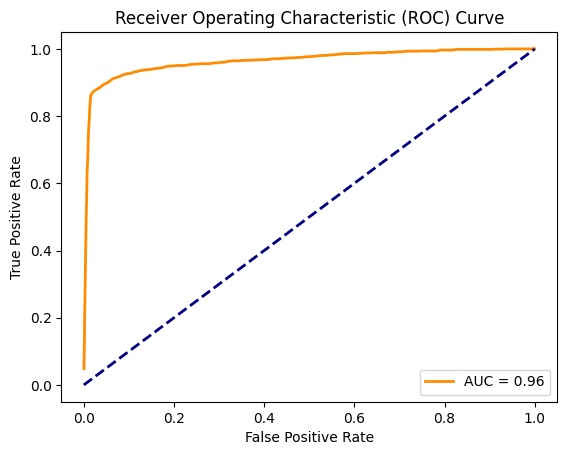

In [ ]:
run()

**Note: please scroll down the last cell until the end, so you can see the ROC curve.**

We can observe that the model's performance surpasses that of the CBIR model using color moments and color histogram, achieving an AUC of 0.96. I added the query images up to 15, instead of 10 as in the previous tasks.

The AUC for 10 query images is 0.95, and it increases to 0.96 when using 15 query images, which is a promising improvement.

# **Comparasion between the three models**

In **tasks 1 and 2**, where we built a CBIR system with color histograms, it's important to note that color histograms excel in capturing overall color in an image. However, they may struggle with complex patterns or textures, affecting retrieval accuracy. On the positive side, color histograms are computationally efficient, keeping things simple by counting color occurrences, making them a practical choice for our CBIR system.

We discovered that adjusting the number of bins in the color histogram can impact the model's performance. Using 120 bins, the model's AUC is 0.75, with an average recall of 0.7136, average precision of 0.2292, average F1 score of 0.2562, and an average elapsed time of 0.0084 seconds. Experimenting with 180 bins resulted in an AUC of 0.72, and with 256 bins, the AUC dropped to 0.71. It's crucial to choose the right number of bins for optimal results and model performance.

In **task 3**, where we built a CBIR system with color moments, incorporating statistical measures like mean, standard deviation, and skewness, we observed that it excels in capturing fine distinctions in color distribution, particularly in scenarios where textures and patterns matter. The retrieval accuracy of CBIR using color moments surpasses that of using color histograms alone. However, it involves more computational steps, including building normalized histograms and extracting statistical measures for each image and query.

Also the length of the feature vector when using color moments depends on the number of channels and moments. In our case, working with RGB images entails 3 channels, each with 3 moments, resulting in a feature vector length of 9. This is in contrast to task 1+2, where the feature vector's length is determined by the number of bins used in the histogram multiplied by the number of channels. A smaller feature vector, can offer computational advantages and streamline processing while maintaining the necessary information for effective content-based image retrieval.

So, color moments, with their significantly shorter feature vectors, typically offer faster retrieval times compared to color histograms.
This difference stems from the reduced computational workload involved in calculating and comparing color moments.

In our exploration, we found that assigning the same weight to all three statistical moments (mean, standard deviation, and skewness) across each of the three color channels resulted in an improved AUC of 0.78. This performance surpassed that of using color histograms alone.

Furthermore, an experiment was conducted by assigning extra weight specifically to the standard deviation across all three channels, while keeping the other measures unchanged. This led to a further enhancement in the model's performance, achieving an AUC of 0.80. This finding suggests that emphasizing the standard deviation can positively influence the system's ability to capture relevant distinctions in the images. In contrast, assigning extra weight to the mean decreased the model's performance to 0.75. The potential issue with emphasizing the mean in certain scenarios, especially when assigning extra weight to it in a CBIR system, could be related to its sensitivity to outliers. If there are extreme values or outlier colors in an image, giving too much weight to the mean might result in a distorted representation of the overall color distribution. It could lead to a situation where the system overly focuses on the average color, potentially ignoring important color details or pattern. Skewness, on the other hand, did not significantly affect the model, mainly due to the dataset primarily consisting of images with relatively symmetrical color distributions, where skewness might not provide much additional discriminative power compared to standard deviation.

Moreover, I conducted an experiment by adding extra moments to the feature vector (Median, Mode, and Kurtosis). However, assigning the same weight to these additional moments did not positively impact the model; instead, the AUC dropped to 0.73. This suggests that these extra moments may not provide significant discriminative power or may require different weightings for optimal model performance.

I observed that giving varying weights to each moment affected the model differently. Specifically, the standard deviation proved beneficial, increasing the model's performance to 0.75, while the mean also contributed positively, raising the overall model accuracy to 0.74.
However, the impact of other moments varied, with some either not significantly affecting the model or even worsening its performance. This nuanced response suggests that the choice of weights for individual moments plays a crucial role in influencing the CBIR model's effectiveness.

In the **fourth task**, where I incorporated EfficientNetB7, I successfully enhanced the model's performance. The AUC of the model increased to 0.96, surpassing color moments by 0.16 and color histogram by 0.21.

EfficientNetB7 is a deep learning model that has been pre-trained on a large dataset and fine-tuned for image classification tasks. It uses complex convolutional layers and attention mechanisms to extract highly informative and discriminative features from images, capturing not only color information but also spatial relationships, textures, and other visual patterns.


**1. Color Histogram with 120 Bins (AUC = 0.75):**

Average Recall: 0.7136 indicates that the model correctly retrieves 71.36% of

relevant images, meaning it often finds most of the images that should be retrieved.

Average Precision: 0.2292 suggests that when the model retrieves a set of images, only 22.92% of them are actually relevant, indicating a higher rate of false positives.

Average F1 Score: 0.2562 balances precision and recall, suggesting a moderate overall performance in terms of both correctly retrieving relevant images and avoiding irrelevant ones.

Average Elapsed Time: 0.0084 seconds per image query demonstrates efficient retrieval speed.

**2. Color Moments with Emphasis on Standard Deviation (AUC = 0.80):**

Average Recall: 0.7537 shows a slight improvement in retrieving relevant images compared to the 120-bin histogram model.

Average Precision: 0.1899, however, suggests a slight decrease in precision, meaning a higher proportion of retrieved images are irrelevant.

Average F1 Score: 0.2693, despite the lower precision, indicates a slightly better overall balance between precision and recall, possibly due to retrieving more relevant images.

Average Elapsed Time: 0.0065 seconds per query demonstrates even faster retrieval than the histogram model.

**3. EfficientNetB7 Deep Learning Model (AUC = 0.96):**

Average Recall: 0.9209 exhibits a significant improvement in retrieving relevant images, reaching a high success rate of 92.09%.

Average Precision: 0.3065, while still lower than recall, shows a notable increase in precision compared to the previous models, meaning a higher proportion of retrieved images are relevant.

Average F1 Score: 0.3804, despite being lower than recall, demonstrates a substantial improvement in overall performance compared to the other models, reflecting a better balance between precision and recall.

Average Elapsed Time: 0.3450 seconds per query is significantly slower than the other models, but still within a reasonable range for many applications.

# **Conclusion**

To sum it all up, our exploration of Content-Based Image Retrieval (CBIR) involved experimenting with color features, illustrating that while simple methods like color histograms offer speed, more advanced methods, such as color moments and deep learning models "EfficientNetB7", make our results more accurate but take longer to process. But, optimizing basic techniques like color histograms involves selecting the right number of color groups (bins) and adjusting them intelligently to improve the accuracy of image retrieval without sacrificing speed.

Also giving extra weight to the appropriate moment based on the nature of the dataset beign used will also improve the accuracy of image retrieval.

Using deep learning techniques, such as Convolutional Neural Networks (CNNs), can be advantageous because color features are handcrafted and manually defined, whereas CNNs like EfficientNetB7 automatically learn and extract features from the data. This automated learning process allows CNNs to provide a more adaptive and nuanced representation of the input, capturing complicated patterns and relationships that might be challenging to define manually. In essence, deep learning techniques offer the benefit of flexibility and adaptability, making them well-suited for tasks that involve complex and diverse data.
